### Zadanie 3.
Zastosuj algorytm PBIL do rozwiązywania uproszczonego problemu klasyfikacji wielospektralnych obrazów satelitarnych w następujący sposób:
- Dany jest obraz wielospektralny o 3 spektrach i rozmiarze 106 x 148 punktów (zapisany w formacie BSQ, pliki ImageRaw.bsq i ImageRaw.hdr). Każdy punkt obrazu można przedstawić jako wektor rozmiaru 3 x 1, a więc cały obraz można przedstawić jako macierz rozmiaru 3 x 15688 (zapisana w pliku ImageRaw.txt). Dana jest wzorcowa klasyfikacja tego obrazu - jest to bitmapa o 11 kolorach i rozmiarze 106 x 148 punktów (zapisana w pliku ImageExpert.bmp). Można przedstawić ją jako wektor rozmiaru 1 x 15688 o wartościach ze zbioru {1, 2, ..., 11} (zapisany w pliku ImageExpert.txt).
- Interesują nas tylko 3 klasy punktów (klasa nr 3, 7 i 9), pozostałe punkty więc usuwamy z danych, otrzymując macierz X rozmiaru 3 x 9350 (punkty obrazu wielospektralnego) oraz wektor C rozmiaru 1 x 9350 o wartościach ze zbioru {1, 2, 3} (wzorcowa klasyfikacja). Dane te zapisane są odpowiednio w plikach ImageRawReduced.txt i ImageExpertReduced.txt.
  
- Dostępnych jest 266 utworzonych wcześniej reguł klasyfikujących. Każda reguła to określona funkcja, która na wejściu dostaje punkt obrazu (wektor rozmiaru 3 x 1), a na wyjściu zwraca etykietę klasy (liczbę ze zbioru {1, 2, 3}). Dla wygody dostępne są już policzone wartości każdej reguły klasyfikującej dla każdego punktu obrazu, a nie same definicje tych reguł (plik ClassificationRules.txt).
- Klasyfikacja oparta na pojedynczej regule klasyfikującej nie daje dobrych wyników, podobnie jak i klasyfikacja oparta na wszystkich 266 regułach klasyfikujących ("większością głosów”). Dobre wyniki natomiast uzyskuje się, jeśli najpierw wybierze się pewien podzbiór zbioru wszystkich reguł klasyfikujących, a później opiera się decyzję na "większości głosów” reguł z tego podzbioru.
- Do wyznaczenia takiego podzbioru użyj algorytmu PBIL. Przestrzenią poszukiwań będzie zbiór wszystkich wektorów binarnych długości d = 266 (kolejne pozycje odpowiadają kolejnym regułom klasyfikującym: 1 oznacza włączenie, a 0 nie włączanie danej reguły do konstruowanego zbioru). Funkcją celu będzie liczba poprawnie poklasyfikowanych punktów obrazu przez klasyfikator oparty na danym podzbiorze reguł klasyfikujących.

In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm, trange
import scipy.stats as sstats
from itertools import product
from PBIL import PBIL

In [2]:
# X = open('data/ImageRawReduced.txt').read().split()
# X = np.array(X).reshape(3, 9350)

Y = open('data/ImageExpertReduced.txt').read().split()
Y = np.array(Y).astype(float).astype(int)

In [3]:
rules = open('data/ClassificationRules.txt').read().split()
rules = np.array(rules).reshape(266, -1) # i-th column contains prediction for each rule
rules = rules.astype(float).astype(int)

In [4]:
tmp = [0]
sstats.mode(rules[tmp], axis=0)[0].ravel()

array([1, 1, 1, ..., 1, 1, 3])

In [5]:
def eval_func(population):
    preds = np.array([(sstats.mode(rules[individual == 1], axis=0)[0] == Y).mean()
                      for individual in population])
    
    return preds

In [6]:
pbil = PBIL(population_size=50, learning_rate=0.01, mutation_prob=0.1, 
            disturbance_rate=0.01, allele_no=266, max_iter=500, eval_func=eval_func)

In [ ]:
pbil.fit()

epoch:  89%|████████▊ | 443/500 [2:33:02<15:29, 16.31s/it]  

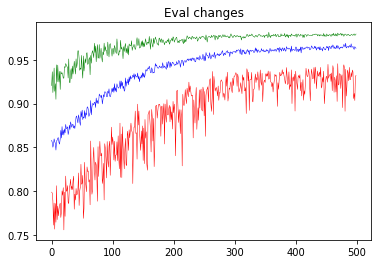

In [9]:
pbil.plot_evals()

In [11]:
print(f'Best eval: {pbil.best_individual_eval}\nFor individual:\n{pbil.best_individual}')

Best eval: 0.9814973262032085
For individual:
[0 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1
 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0
 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0
 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 1 0 0]
